In [1]:
import os, math, sys, scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

path    = os.getcwd()
optpath = path+'/optimization_data'
inpath  = path+'/initial_data'

In [2]:
maindf = pd.read_csv("2021Oct_mcirc", index_col=0)
df01 = maindf.loc[(maindf.incon=='over')].reset_index(drop=True)
df02 = maindf.loc[(maindf.incon=='std')].reset_index(drop=True)
df03 = maindf.loc[(maindf.incon=='under')].reset_index(drop=True)
del maindf

df01['jfactor']=np.exp(-1*df01.eopt)
df02['jfactor']=np.exp(-1*df02.eopt)
df03['jfactor']=np.exp(-1*df03.eopt)

compdf = pd.read_csv("czapla_jctc_2012.csv", index_col=0)
compdf['eopt'] = -1*np.log(compdf.jfactor)

In [3]:
df01.head(10)

,length,incon,forcefield,eo,eopt,eopt_elastic,eopt_tilt,eopt_roll,eopt_twist,eopt_shift,eopt_slide,eopt_rise,wr,tw,lk,jfactor
0,105,over,ideal,1203.210071,63.083420,63.0834,13.175900,13.175858,36.620056,0.055802,0.055802,0.000001,-3.435980e-09,9.0,9.0,4.010687e-28
1,106,over,ideal,533.153622,26.433410,26.4334,13.051689,13.051704,0.329033,0.000492,0.000492,0.000000,7.954010e-12,10.0,10.0,3.312195e-12
2,107,over,ideal,312.226075,27.167289,27.1673,12.929712,12.929719,1.304031,0.001913,0.001913,0.000000,-3.191620e-11,10.0,10.0,1.589997e-12
3,108,over,ideal,155.246178,28.535615,28.5356,12.809987,12.809997,2.907257,0.004187,0.004187,0.000000,4.822630e-12,10.0,10.0,4.047062e-13
4,109,over,ideal,62.213784,30.521022,30.5210,12.692455,12.692470,5.121616,0.007240,0.007240,0.000000,-2.718690e-11,10.0,10.0,5.557616e-14
5,110,over,ideal,33.128833,33.106772,33.1068,12.577075,12.577063,7.930619,0.011007,0.011007,0.000000,-4.351990e-11,10.0,10.0,4.187083e-15
6,111,over,ideal,67.991169,36.276725,36.2767,12.463765,12.463743,11.318363,0.015427,0.015427,0.000000,-2.409320e-10,10.0,10.0,1.758808e-16
7,112,over,ideal,166.800722,40.015313,40.0153,12.352466,12.352456,15.269511,0.020440,0.020440,0.000000,-3.278960e-11,10.0,10.0,4.183795e-18
8,113,over,ideal,329.557323,44.307511,44.3075,12.243132,12.243143,19.769244,0.025996,0.025996,0.000000,-8.599970e-11,10.0,10.0,5.721270e-20
9,114,over,ideal,556.260889,49.138824,49.1388,12.135720,12.135741,24.803277,0.032043,0.032043,0.000000,-5.678830e-10,10.0,10.0,4.563309e-22


In [5]:
compdf.head(10)

,jfactor,eopt
length,,
120,4.640000e-12,26.096307
121,9.500000e-13,27.682314
122,2.810000e-12,26.597837
123,1.620000e-11,24.846010
124,5.350000e-11,23.651339
125,1.390000e-10,22.696547
126,1.930000e-10,22.368331
127,2.180000e-10,22.246526
128,1.590000e-10,22.562117


<AxesSubplot:>

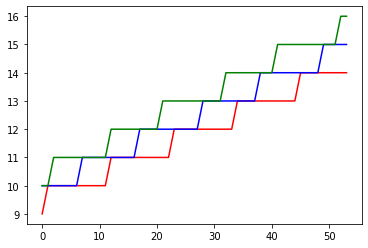

In [5]:
df01.lk.plot(color="red")
df02.lk.plot(color="blue")
df03.lk.plot(color="green")

<AxesSubplot:xlabel='length'>

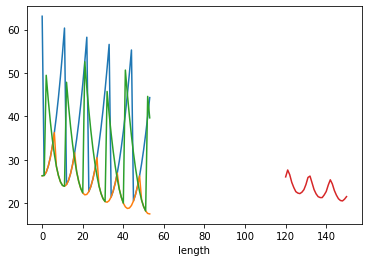

In [6]:
df01.eopt.plot()
df02.eopt.plot()
df03.eopt.plot()
compdf.eopt.plot()

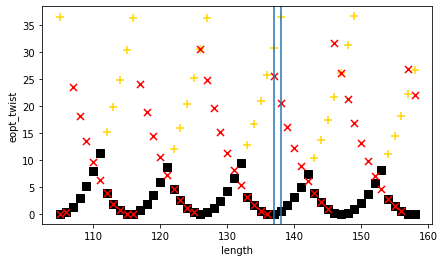

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

df01.plot(kind='scatter', x='length', y='eopt_twist', marker='+', s=50,
                                           color='gold', ax=ax)

df02.plot(kind='scatter', x='length', y='eopt_twist', marker='s', s=50,
                                           color='black', ax=ax)

df03.plot(kind='scatter', x='length', y='eopt_twist', marker='x', s=50,
                                           color='red', ax=ax)

ax.axvline(x=137)
ax.axvline(x=138)


plt.show()
plt.clf()


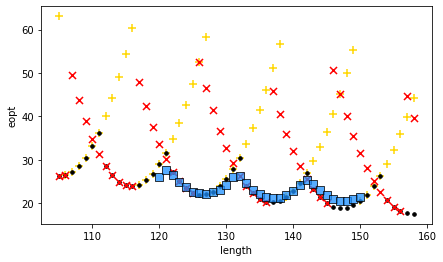

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

df01.plot(kind='scatter', x='length', y='eopt', marker='+', s=50,
                                           color='gold', ax=ax)

df02.plot(kind='scatter', x='length', y='eopt', marker='.', s=50,
                                           color='black', ax=ax)

df03.plot(kind='scatter', x='length', y='eopt', marker='x', s=50,
                                           color='red', ax=ax)

compdf.reset_index().plot(kind='scatter', x='length', y='eopt', s=50,
                          marker='s', color='dodgerblue', edgecolor='black', alpha=0.75, ax=ax)

plt.show()
plt.clf()

In [11]:
log_df = pd.DataFrame(columns=["mcirc_over", "mcirc_std", "mcirc_under", "jctc"], index=[i for i in range(120, 151)])

df_over = df01.reset_index(drop=True).set_index('length')
df_std  = df02.reset_index(drop=True).set_index('length')
df_under = df03.reset_index(drop=True).set_index('length')

for i in range(120, 151):
    log_df.at[i, "mcirc_over"]  = df_over.at[i, 'jfactor']
    log_df.at[i, "mcirc_std"]   = df_std.at[i, 'jfactor']
    log_df.at[i, "mcirc_under"] = df_under.at[i, 'jfactor']
    log_df.at[i, "jctc"]        = compdf.at[i, 'jfactor']

del df_over, df_under, df_std
log_df = log_df.astype(float)

log_10_df = np.log10( log_df )
del log_df

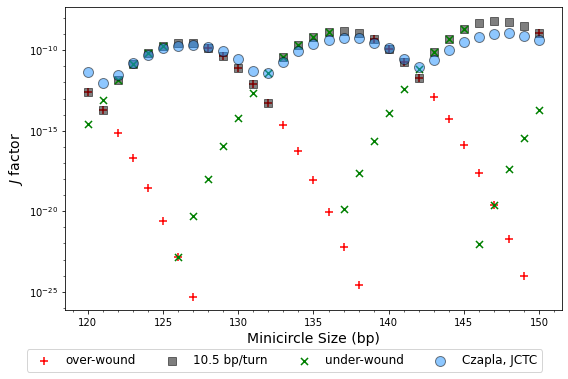

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

log_10_df.reset_index().plot(kind='scatter', x='index', y='mcirc_over',
                             label="over-wound", marker='+', s=50, color='red', ax=ax)

log_10_df.reset_index().plot(kind='scatter', x='index', y='mcirc_std',
                             label="10.5 bp/turn", marker='s', s=50, color='black', edgecolor='black', alpha=0.50, ax=ax)

log_10_df.reset_index().plot(kind='scatter', x='index', y='mcirc_under',
                             label="under-wound", marker='x', s=50, color='green', ax=ax)

log_10_df.reset_index().plot(kind='scatter', x='index', y='jctc',
                             label="Czapla, JCTC", marker='o', s=100, color='dodgerblue', edgecolor='black', alpha=0.50, ax=ax)

ax.set_ylabel("${J}$ factor", fontsize=14, style="normal")
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("$10^{%d}$"))
ax.set_xlabel("Minicircle Size (bp)", fontsize=14, style="normal")
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.50, -0.06), fontsize=12, ncol=4)
plt.tight_layout()

plt.savefig("mcirc_jfactor_profiles_v1.png", dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()
plt.clf()